# Module 3 Machine Learning Exam - Ivan Sebastian

# Hotel Reservation Cancellation Prediction

Anda adalah Data Scientist di sebuah perusahaan hotel. Anda diberikan dataset berisi informasi pemesanan kamar hotel (booking information) baik untuk hotel kota (city hotel) maupun hotel resort. Dataset ini juga mengandung kapan booking dilakukan, lama menginap, jumlah pengunjung dewasa, anak-anak, dan/atau bayi, serta ketersediaan tempat parkir. Informasi lain mengenai dataset bisa Anda baca di keterangan dataset di bawah ini:

Columns:
- **hotel** : Hotel (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled** : Value indicating if the booking was canceled (1) or not (0)
- **lead_time** : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year** : Year of arrival date
- **arrival_date_month** : Month of arrival date
- **arrival_date_week_number** : Week number of year for arrival date
- **arrival_date_day_of_month** : Day of arrival date
- **stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults** : Number of adults
- **children** : Number of children
- **babies** : Number of babies
- **meal** : Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country** : Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type** : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type** : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent** : ID of the travel agency that made the booking
- **company** : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type** : Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces** : Number of car parking spaces required by the customer
- **total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status** : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

**Dataset Source** : https://www.kaggle.com/jessemostipak/hotel-booking-demand/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df = df[0:3000]

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           3000 non-null   object 
 1   is_canceled                     3000 non-null   int64  
 2   lead_time                       3000 non-null   int64  
 3   arrival_date_year               3000 non-null   int64  
 4   arrival_date_month              3000 non-null   object 
 5   arrival_date_week_number        3000 non-null   int64  
 6   arrival_date_day_of_month       3000 non-null   int64  
 7   stays_in_weekend_nights         3000 non-null   int64  
 8   stays_in_week_nights            3000 non-null   int64  
 9   adults                          3000 non-null   int64  
 10  children                        3000 non-null   float64
 11  babies                          3000 non-null   int64  
 12  meal                            30

In [5]:
pd.DataFrame(dict(dataFeatures = df.columns,
                  dataType = df.dtypes,
                  null = df.isna().sum(),
                  nullPct = round(df.isna().sum() / len(df) *100,2),
                  unique = df.nunique(),
                  uniqueSample = [list(df[i].drop_duplicates().sample(1)) for i in df.columns])).reset_index(drop=True) 

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.00,1,[Resort Hotel]
1,is_canceled,int64,0,0.00,2,[1]
2,lead_time,int64,0,0.00,229,[107]
3,arrival_date_year,int64,0,0.00,1,[2015]
4,arrival_date_month,object,0,0.00,5,[November]
5,arrival_date_week_number,int64,0,0.00,20,[27]
6,arrival_date_day_of_month,int64,0,0.00,31,[31]
7,stays_in_weekend_nights,int64,0,0.00,10,[4]
8,stays_in_week_nights,int64,0,0.00,18,[16]
9,adults,int64,0,0.00,14,[27]


## A. Data Cleaning and Preprocessing

## Dropping

Dropping useless columns.
Since the instructions given to us is to only use 3000 rows of data instead of the whole dataset, the dataset has some columns that is useless.

### Column with 1 unique value
Columns **hotel, arrival_date_year, is_repeated_guest, previous_cancellations, and previous_bookings_not_canceled** is dropped because it only has 1 unique value in it.

### Column with 95.9% missing value
Column **company** is dropped because it has 95.9% missing value.

### Column with 1 missing value
Since there's only 1 missing value for the **country** column, rather than trying to fill it, i think it's much more efficient to just drop that 1 row.

### Column agent
Looking at the data, the **agent** column seems a little useful to help us with our machine learning model. 

But the **agent** column has 465 missing values in it. I think what agent the customer came from won't help much for the prediction model.

Also the **agent** column has 66 unique values, i don't think we can fill the missing values with so many possibilities. 

Rather than taking a risk by dropping 465 rows of data for maybe a little improvement or maybe not at all for our model, i think dropping the column itself will be much better.

In [6]:
df.drop(['hotel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'company', 'arrival_date_year'],axis=1, inplace=True)

In [7]:
df = df[~df['country'].isna()]

In [8]:
df.groupby(['agent', 'is_canceled']).count()['lead_time'].sort_values(ascending=False).head(10)

agent  is_canceled
240.0  0              707
       1              535
250.0  0              193
241.0  0              120
250.0  1               53
40.0   0               49
243.0  0               42
134.0  1               39
242.0  1               37
142.0  0               37
Name: lead_time, dtype: int64

In [9]:
df['agent'].nunique()

66

In [10]:
df.drop('agent', axis=1, inplace=True)

## B. Exploratory Data Analysis

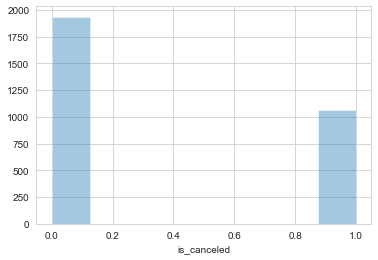

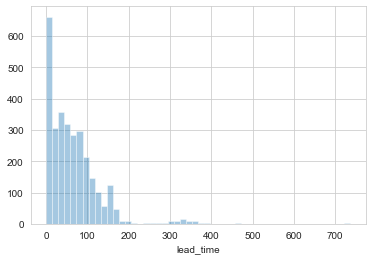

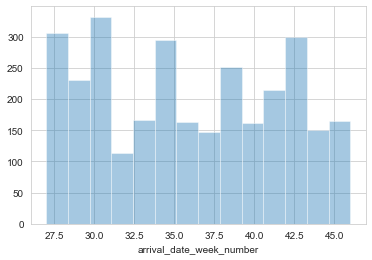

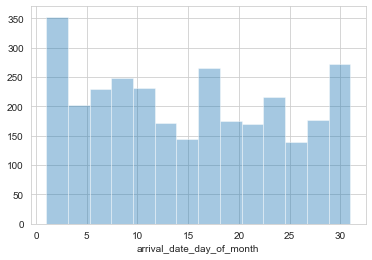

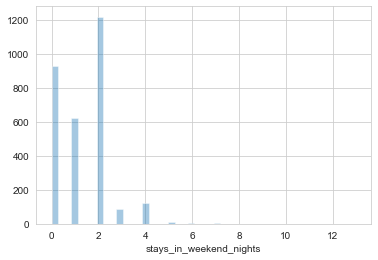

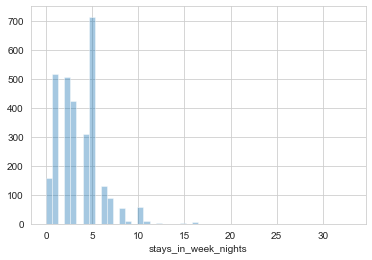

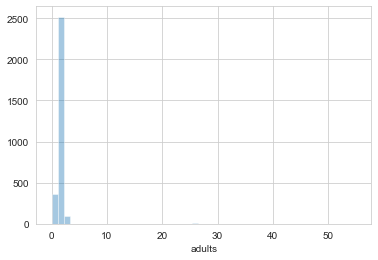

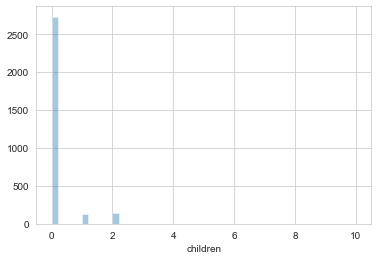

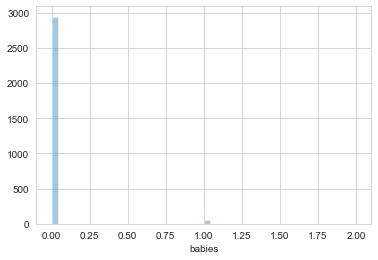

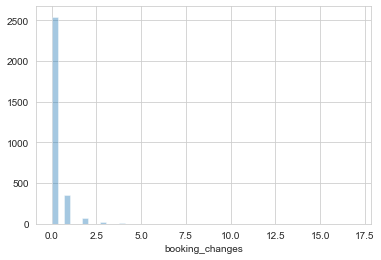

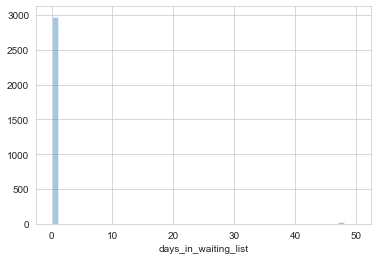

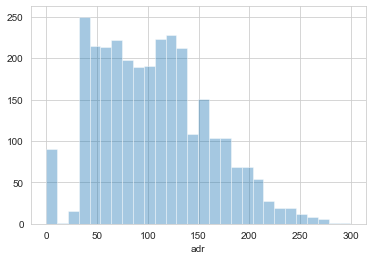

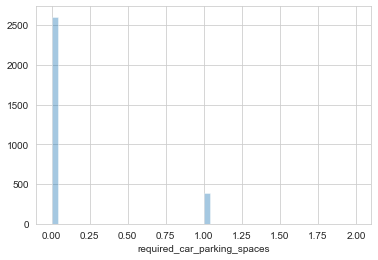

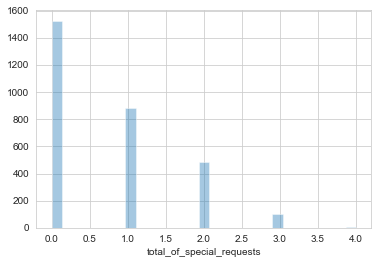

In [11]:
for i in df.columns:
    if df[i].dtypes != 'O':
        sns.distplot(df[i], kde=False)
        plt.show()

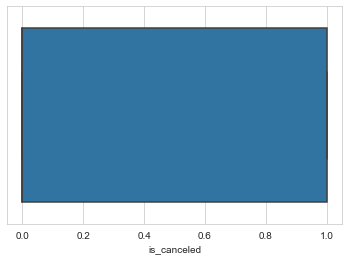

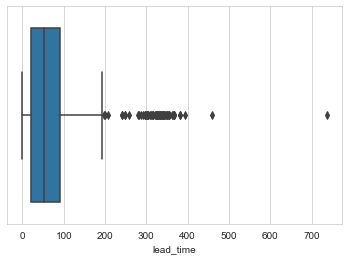

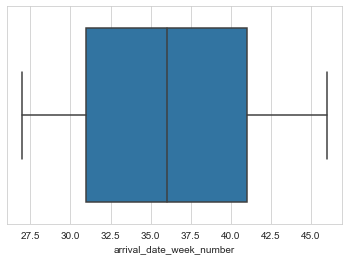

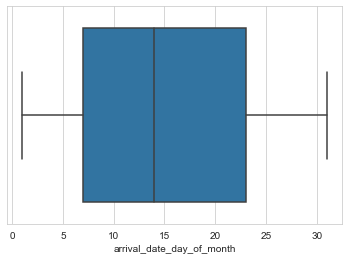

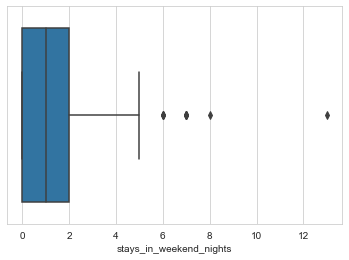

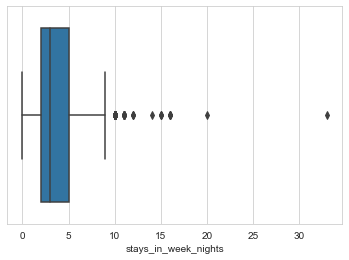

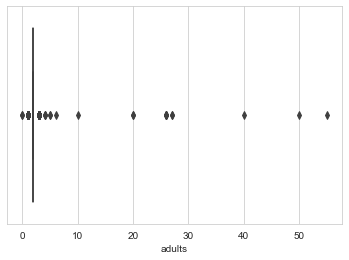

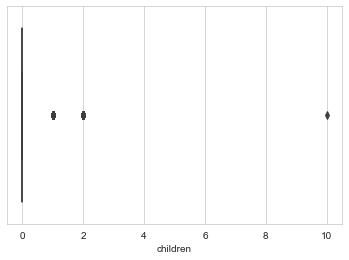

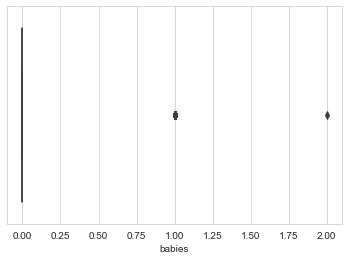

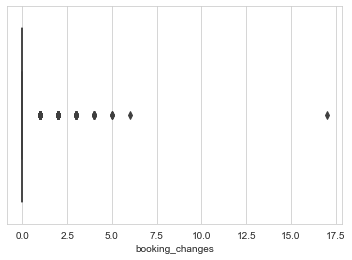

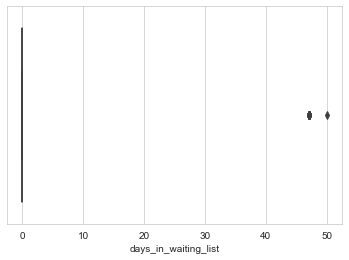

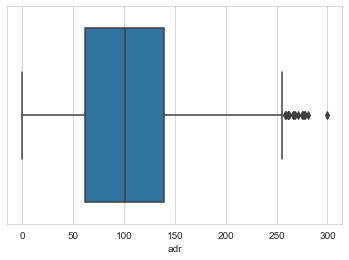

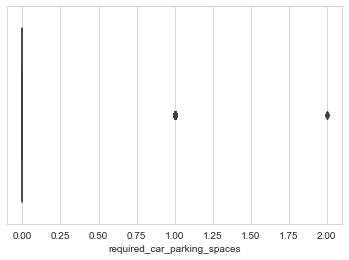

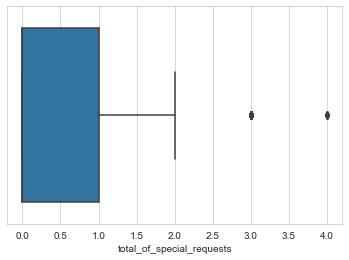

In [12]:
for i in df.columns:
    if df[i].dtypes != 'O':
        sns.boxplot(df[i])
        plt.show()

Looking at value counts and hue to target, to see if the columns are necessary for the prediction model.

In [13]:
for i in df.columns:
    print(i)
    print(df[i].value_counts().head(10))
    print('Unique values : ', df[i].nunique())
    print('\n')

is_canceled
0    1936
1    1063
Name: is_canceled, dtype: int64
Unique values :  2


lead_time
0      157
1       81
2       54
78      52
4       50
47      50
3       46
148     41
57      37
36      35
Name: lead_time, dtype: int64
Unique values :  229


arrival_date_month
July         841
October      748
August       643
September    602
November     165
Name: arrival_date_month, dtype: int64
Unique values :  5


arrival_date_week_number
29    231
43    226
41    215
28    176
30    169
33    166
36    164
31    163
40    162
35    150
Name: arrival_date_week_number, dtype: int64
Unique values :  20


arrival_date_day_of_month
9     138
3     137
10    130
24    128
1     125
31    118
6     117
7     113
8     110
4     108
Name: arrival_date_day_of_month, dtype: int64
Unique values :  31


stays_in_weekend_nights
2     1217
0      927
1      624
4      124
3       86
5        9
7        6
6        4
13       1
8        1
Name: stays_in_weekend_nights, dtype: int64
Unique values 

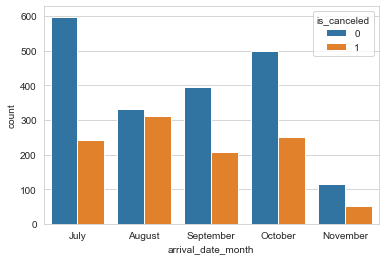

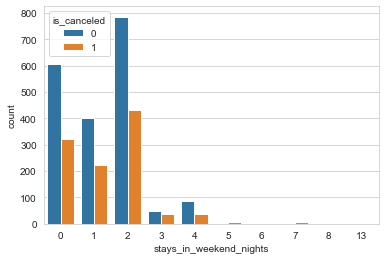

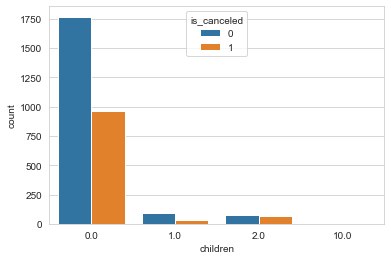

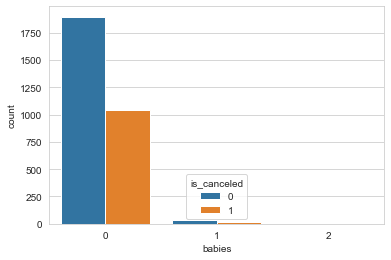

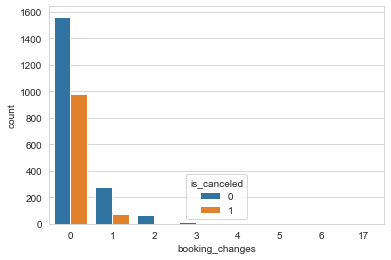

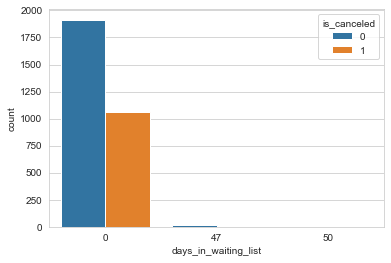

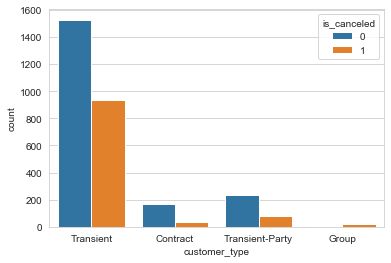

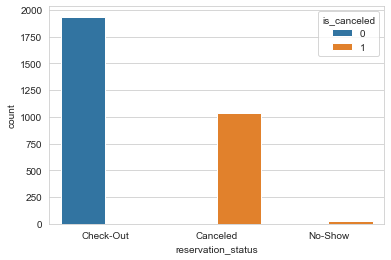

In [14]:
for i in ['arrival_date_month', 'stays_in_weekend_nights', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'customer_type', 'reservation_status']:
    sns.countplot(df[i], hue=df['is_canceled'])
    plt.show()

Looking at the correlation heatmap below, **lead_time** somewhat affects the target column. But the **lead_time** distribution is skewed, so i'm gonna clean it and see the correlation again.

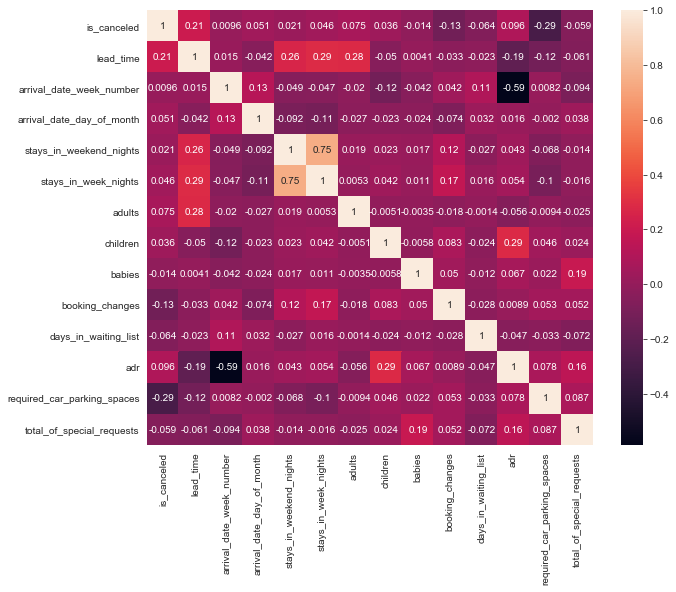

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Dropping Outliers

In [16]:
df_no_outlier = df.copy()
for i in ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']:
    Q1 = df_no_outlier.describe()[i]['25%']
    Q3 = df_no_outlier.describe()[i]['75%']
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    below = Q1 - 1.5 * IQR
    
    df_no_outlier = df_no_outlier[(df_no_outlier[i] > below) & (df_no_outlier[i] < upper)]

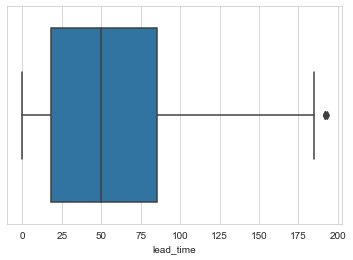

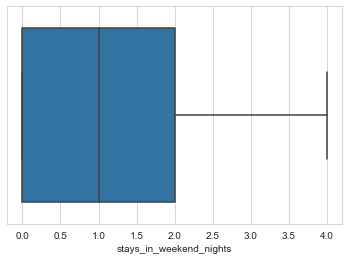

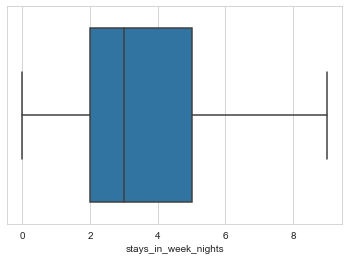

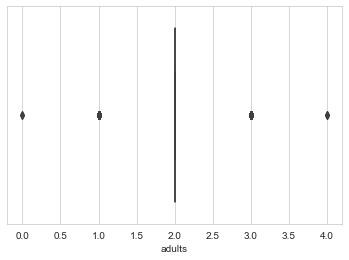

In [17]:
for i in ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults']:
    sns.boxplot(df_no_outlier[i])
    plt.show()

Okay, so after looking the correlation below, what i can say for our model is:

- The longer the **lead time** the higher the chance of customer cancelling the stay
- The more **car parking space required** by the customer the less chance they cancel the stay

Less significant but:

- The more **booking changes** the customer did, the less chance they cancel the stay
- The more **ADR**, the more chances they cancel the stay

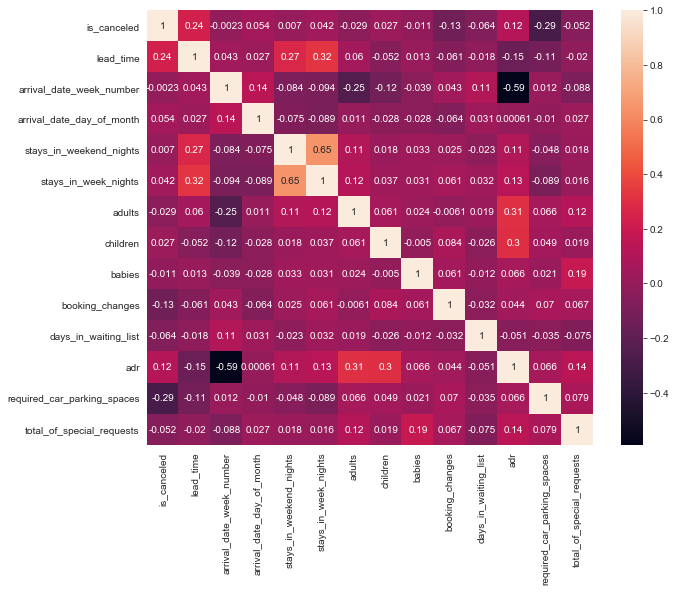

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df_no_outlier.corr(), annot=True)
plt.show()

In [19]:
df_no_outlier['is_canceled'][df_no_outlier['reservation_status'] == 'Check-Out'].unique()

array([0], dtype=int64)

As you can see above, if the reservation status is "Check-Out" it means the customer doesn't cancel and actually stayed in the hotel. So this feature is kinda useless.

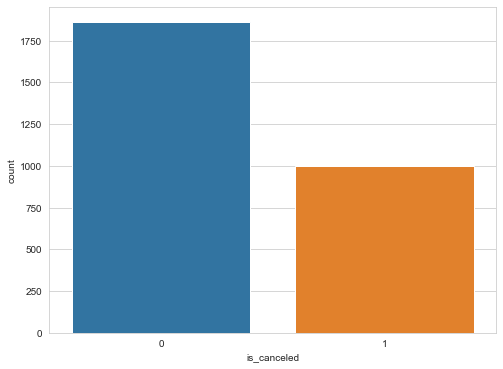

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(df_no_outlier['is_canceled'])
plt.show()

As seen above, we need to keep in mind that we are dealing with imbalanced classification, although looking at the plot, it doesn't look like there's too much imbalanced.

Note:
I avoid using Oversampling technique because:

- I want to preserve the original data as much as possible
- Using oversampling technique might make our machine learning model reluctant to overfitting
- There's not too much imbalanced, i think it's fine to just carefully look at the classification report instead of relying on oversampling technique

## C. Model Building & Hyper-parameter Tuning

## Encoding Categorical Variables

In [21]:
X = df_no_outlier.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'country'], axis=1)
y = df_no_outlier['is_canceled']

for i in X.columns:
    le = LabelEncoder()
    if X[i].dtypes == 'O':
        X[i] = le.fit_transform(X[i])

## Splitting the dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling the dataset with MinMaxScaler

Looking at the dataset, we have a variety of range for each variable. We need to scale this, so the model won't think that other variable are more significant (e.g. arrival day range from 1-31 while arrival week range from 27-46, the model might think arrival week is more significant since it has higher value).

Note:
Scaling the dataset **after** splitting it to avoid data leakage (e.g. if data is 1-25 in train, and 1-30 in test, and 1-31 in the whole dataset, the model will already know the range if we scale it before splitting, thus causing data leakage)

In [23]:
X_train.describe()

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,...,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000
mean,57.832750,1.925131,35.924694,15.335814,1.219352,3.246935,1.919877,0.136602,0.021454,0.436077,...,1.677758,1.223292,2.159807,0.198336,0.042907,0.412872,1.985114,106.837750,0.132662,0.735989
std,45.902943,1.488192,5.573585,9.127352,1.005701,1.948384,0.389490,0.461092,0.147914,0.809943,...,0.561906,1.586203,2.115445,0.547824,0.204842,4.394162,0.576019,54.103002,0.341856,0.867428
min,0.000000,0.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,31.000000,7.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,65.000000,0.000000,0.000000
50%,51.000000,1.000000,36.000000,15.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,103.180000,0.000000,0.000000
75%,87.000000,3.000000,41.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,2.000000,143.125000,0.000000,1.000000
max,193.000000,4.000000,46.000000,31.000000,4.000000,9.000000,4.000000,2.000000,2.000000,3.000000,...,2.000000,7.000000,8.000000,5.000000,2.000000,50.000000,3.000000,280.740000,2.000000,4.000000


In [24]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

## Model Training and Evaluation

The models i chose for this assignment are:
- Logistic Regression : It is one of the simple machine learning classification model and is fit for binary problem such as this one.
- Random Forest : One of the strongest machine learning model that could be use for classification, it is good to avoid overfitting and useful for imbalanced classification problem
- Linear Support Vector Machine : Another simple classification ML model

In [25]:
models = [LogisticRegression(), RandomForestClassifier(), LinearSVC()]
model_name = ['Logistic Regression', 'Random Forest', 'Linear SVC']
for name, model in zip(model_name, models):
    print(name)
    cross_score = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Cross Validation Score (Train Data): ', cross_score)
    print("Accuracy of Cross Val : %0.2f (+/- %0.2f)" % (cross_score.mean(), cross_score.std() * 2))
    print('Accuracy Score (Test Data): ', score)
    print(classification_report(y_test, y_pred))
    print('\n')

Logistic Regression
Cross Validation Score (Train Data):  [0.77461707 0.76586433 0.74617068 0.76148796 0.73464912]
Accuracy of Cross Val : 0.76 (+/- 0.03)
Accuracy Score (Test Data):  0.7709790209790209
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       385
           1       0.73      0.48      0.58       187

    accuracy                           0.77       572
   macro avg       0.76      0.70      0.71       572
weighted avg       0.76      0.77      0.76       572



Random Forest
Cross Validation Score (Train Data):  [0.80962801 0.78774617 0.82275711 0.8249453  0.78508772]
Accuracy of Cross Val : 0.81 (+/- 0.03)
Accuracy Score (Test Data):  0.8059440559440559
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       385
           1       0.74      0.63      0.68       187

    accuracy                           0.81       572
   macro avg       0.79      0.76      0.77       572

Looking at the results above, we could see cleary that all our model **overfits** the data. Although keep in mind that the models we used are not tune at all to deal with this imbalanced classification problem. But because i don't have much time for this assignment, instead of tuning all the model to get the best result, i'm gonna go ahead and use the current best model from the result which is Random Forest.

As seen from the results, the other models overfits really bad for this imbalanced classification, while the Random Forest is much better handling this.

## D. Model Evaluation

## Hyper-parameter Tuning

From the previous result, we already chose Random Forest as our machine learning model. Now comes everyone favorite part (and most time-consuming), Hyper-parameter Tuning. The previous result was not bad, but was not good either.

That's where Hyper-parameter Tuning comes in, i'm hoping after tuning the model, the accuracy when up and becomes more robust to overfitting.

Note: I'm using RandomizedSearchCV instead of GridSearchCV because i don't have time

In [26]:
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
 
min_samples_leaf = [1, 2, 4]
 
min_samples_split = [2, 5, 10]
 
n_estimators =  [200, 400, 600, 800, 1000]

In [27]:
model = RandomForestClassifier()

param = {'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 'min_samples_split' : min_samples_split, 'n_estimators' : n_estimators}

rs_RandomForest = RandomizedSearchCV(model, param, cv=5, scoring='accuracy')

In [28]:
%%time
print('Random Forest\n')
rs = rs_RandomForest.fit(X_train, y_train)
print('Best Params : ', rs.best_params_)
y_score = rs.best_estimator_.predict(X_test)
eval_score = accuracy_score(y_test, y_score)
print('Best Score on Train Data : ', rs.best_score_)
print('Accuracy Score on Test Data : ', eval_score)
print(classification_report(y_test, y_score))

Random Forest

Best Params :  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Score on Train Data :  0.8104149871396213
Accuracy Score on Test Data :  0.8024475524475524
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       385
           1       0.73      0.64      0.68       187

    accuracy                           0.80       572
   macro avg       0.78      0.76      0.77       572
weighted avg       0.80      0.80      0.80       572

Wall time: 2min 51s


It seems even after using doing Hyper-parameter tuning, our model can only achieve 80% accuracy at most. No worries, we will take the best parameter we got, and try to apply it to our next section Feature Importance.

## Feature Importance

After getting the best parameters, our model is still not the best. Maybe it still overfits, so i'm gonna actually reduce the number of features we used based on the Feature Importance

[0.15786785 0.03623492 0.07229226 0.0918392  0.03749839 0.06835369
 0.01560522 0.01017615 0.00412271 0.01751315 0.04602182 0.01452957
 0.03508396 0.05364903 0.02688091 0.04852356 0.00147721 0.0220295
 0.13528326 0.06595231 0.03906533]


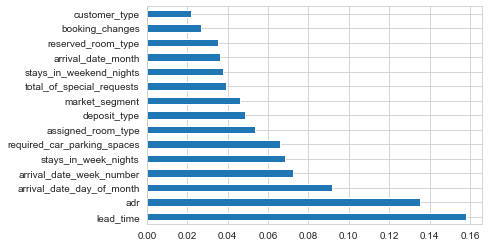

In [29]:
model = RandomForestClassifier(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1, max_depth= 80)
model.fit(X_train, y_train)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Doing it All Over Again
This time with 10 Best Features only.

Our model is worse.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Accuracy :  0.7972027972027972
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       385
           1       0.70      0.66      0.68       187

    accuracy                           0.80       572
   macro avg       0.77      0.76      0.77       572
weighted avg       0.79      0.80      0.80       572



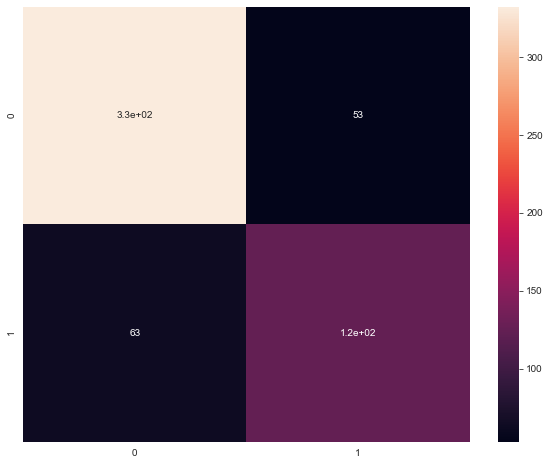

In [33]:
X = df_no_outlier[['lead_time', 'adr', 'arrival_date_day_of_month', 'arrival_date_week_number', 'stays_in_week_nights', 
                   'required_car_parking_spaces', 'assigned_room_type', 'deposit_type', 'market_segment', 
                   'total_of_special_requests']]
y = df_no_outlier['is_canceled']

for i in X.columns:
    le = LabelEncoder()
    if X[i].dtypes == 'O':
        X[i] = le.fit_transform(X[i])
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

model = RandomForestClassifier(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1, max_depth= 80)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

## Doing it All Over Again
This time with 15 Best Features only.

Still worse than using all Features, so i'm gonna use the all features for our deciding model.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Accuracy :  0.8076923076923077
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       385
           1       0.72      0.67      0.69       187

    accuracy                           0.81       572
   macro avg       0.78      0.77      0.78       572
weighted avg       0.80      0.81      0.81       572



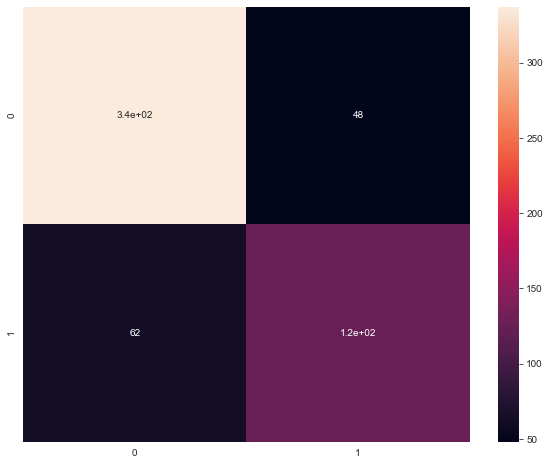

In [34]:
X = df_no_outlier[['lead_time', 'adr', 'arrival_date_day_of_month', 'arrival_date_week_number', 'stays_in_week_nights', 
                   'required_car_parking_spaces', 'assigned_room_type', 'deposit_type', 'market_segment', 
                   'total_of_special_requests', 'customer_type', 'booking_changes',
                   'reserved_room_type', 'arrival_date_month', 'stays_in_weekend_nights']]
y = df_no_outlier['is_canceled']

for i in X.columns:
    le = LabelEncoder()
    if X[i].dtypes == 'O':
        X[i] = le.fit_transform(X[i])
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

model = RandomForestClassifier(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1, max_depth= 80)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

## The Model I Use

Accuracy :  0.8111888111888111
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       385
           1       0.73      0.67      0.70       187

    accuracy                           0.81       572
   macro avg       0.79      0.77      0.78       572
weighted avg       0.81      0.81      0.81       572



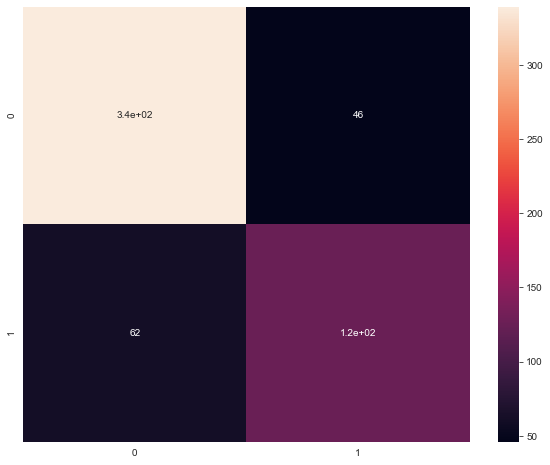

In [35]:
X = df_no_outlier.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'country'], axis=1)

y = df_no_outlier['is_canceled']

for i in X.columns:
    le = LabelEncoder()
    if X[i].dtypes == 'O':
        X[i] = le.fit_transform(X[i])
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

model = RandomForestClassifier(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1, max_depth= 80)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

### Pilih jenis kesalahan yang paling berpengaruh pada kerugian perusahaan dan jelaskan alasan pilihan Anda!

Menurut saya lebih berbahaya jika model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan. Karena, jika user datang dan kita prediksi user akan cancel booking akan menyebabkan sisi hotel tidak _ready_ untuk menyiapkan segala hal untuk menyambut user, sehingga pengalaman user akan menjadi jelek dan akan merusak nama baik hotel akibat servis yang tidak siap. 

### Lalu, pilih dan jelaskan evaluation metric yang bisa menekan jenis kesalahan yang Anda pilih!
  
Precision Positive dan Recall Negative, karena kita bermasalah dengan Type I yaitu False Positive, dimana prediksi user cancel padahalnya aktualnya tidak. Sehingga kita harus menekan False Positive

### Jelaskan langkah Anda untuk meningkatkan performa model ML untuk bisa menekan jenis kesalahan tersebut!

Hal yang telah saya lakukan diatas adalah:

- Pilih dari 3 Model
- Hyper-parameter Tuning
- Feature Importance

dan Model yang dihasilkan masih kurang dari sempurna, sehingga menurut saya permasalahan utama ada karena **Imbalanced Classification Problem** ini.

Sehingga menurut saya untuk meningkatkan performa, dapat dicoba:

- Oversampling Technique seperti SMOTE
- Stratified Train Test Split
- Stratified KFold